In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import time
import tracemalloc

In [2]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp_undersampling.csv', delimiter=";")
datasdp.head()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
0,5,1,0,5,250,0,470,38,37,36,0,36,0,1,0,0,1,0
1,5,2,4,5,34,0,57,15,15,12,0,12,0,2,0,1,2,0
2,15,3,2,15,13,0,176,31,30,6,0,6,0,0,0,0,2,0
3,5,2,2,5,0,0,46,4,12,6,0,6,0,0,0,0,3,0
4,6,1,0,6,15,0,42,11,6,6,0,6,0,0,0,0,0,0


In [4]:
datasdp.describe()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,6.686454,1.592085,3.709285,6.686454,338.796043,0.235921,134.684170,21.424658,31.296804,11.816591,1.359209,7.687215,1.442161,1.368341,0.093607,0.444444,2.522070,0.432268
std,8.933145,1.100217,18.917807,8.933145,3015.686597,1.356170,310.092242,43.409342,92.515717,26.683368,13.170233,17.638376,6.002672,3.687500,1.557598,3.898996,6.215467,0.495580
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,12.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,4.000000,3.000000,0.000000,44.000000,8.000000,7.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.000000,2.000000,2.000000,8.000000,22.000000,0.000000,121.000000,23.750000,24.000000,11.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000
max,134.000000,10.000000,405.000000,134.000000,64947.000000,18.000000,4133.000000,545.000000,1758.000000,374.000000,366.000000,315.000000,87.000000,58.000000,54.000000,123.000000,116.000000,1.000000


In [5]:
datasdp.head()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
0,5,1,0,5,250,0,470,38,37,36,0,36,0,1,0,0,1,0
1,5,2,4,5,34,0,57,15,15,12,0,12,0,2,0,1,2,0
2,15,3,2,15,13,0,176,31,30,6,0,6,0,0,0,0,2,0
3,5,2,2,5,0,0,46,4,12,6,0,6,0,0,0,0,3,0
4,6,1,0,6,15,0,42,11,6,6,0,6,0,0,0,0,0,0


In [6]:
datasdp.tail()

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
1309,4,2,0,4,1,0,8,3,2,2,0,2,0,0,0,0,0,1
1310,5,2,0,5,0,0,22,3,1,1,0,1,0,0,0,0,0,1
1311,6,2,2,6,80,0,105,30,19,17,0,14,3,0,0,0,1,1
1312,12,7,7,12,108,12,358,36,43,16,5,7,4,0,1,0,0,1
1313,4,1,9,4,3,0,5,0,3,3,0,0,0,0,0,0,0,1


In [7]:
datasdp.sample(5)

,cbo,dit,fanin,fanout,lcom,noc,loc,rfc,wmc,totalMethodsQty,protectedMethodsQty,publicMethodsQty,privateMethodsQty,finalFieldsQty,protectedFieldsQty,publicFieldsQty,privateFieldsQty,bugs
686,11,1,0,11,21,0,93,23,8,7,0,7,0,0,0,0,0,0
478,5,1,0,5,10,0,56,18,6,5,0,5,0,0,0,0,0,0
1239,3,1,0,3,6,0,14,3,4,4,3,0,0,1,0,0,0,1
389,5,1,0,5,10,0,68,17,5,5,0,5,0,0,0,0,0,0
817,1,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1


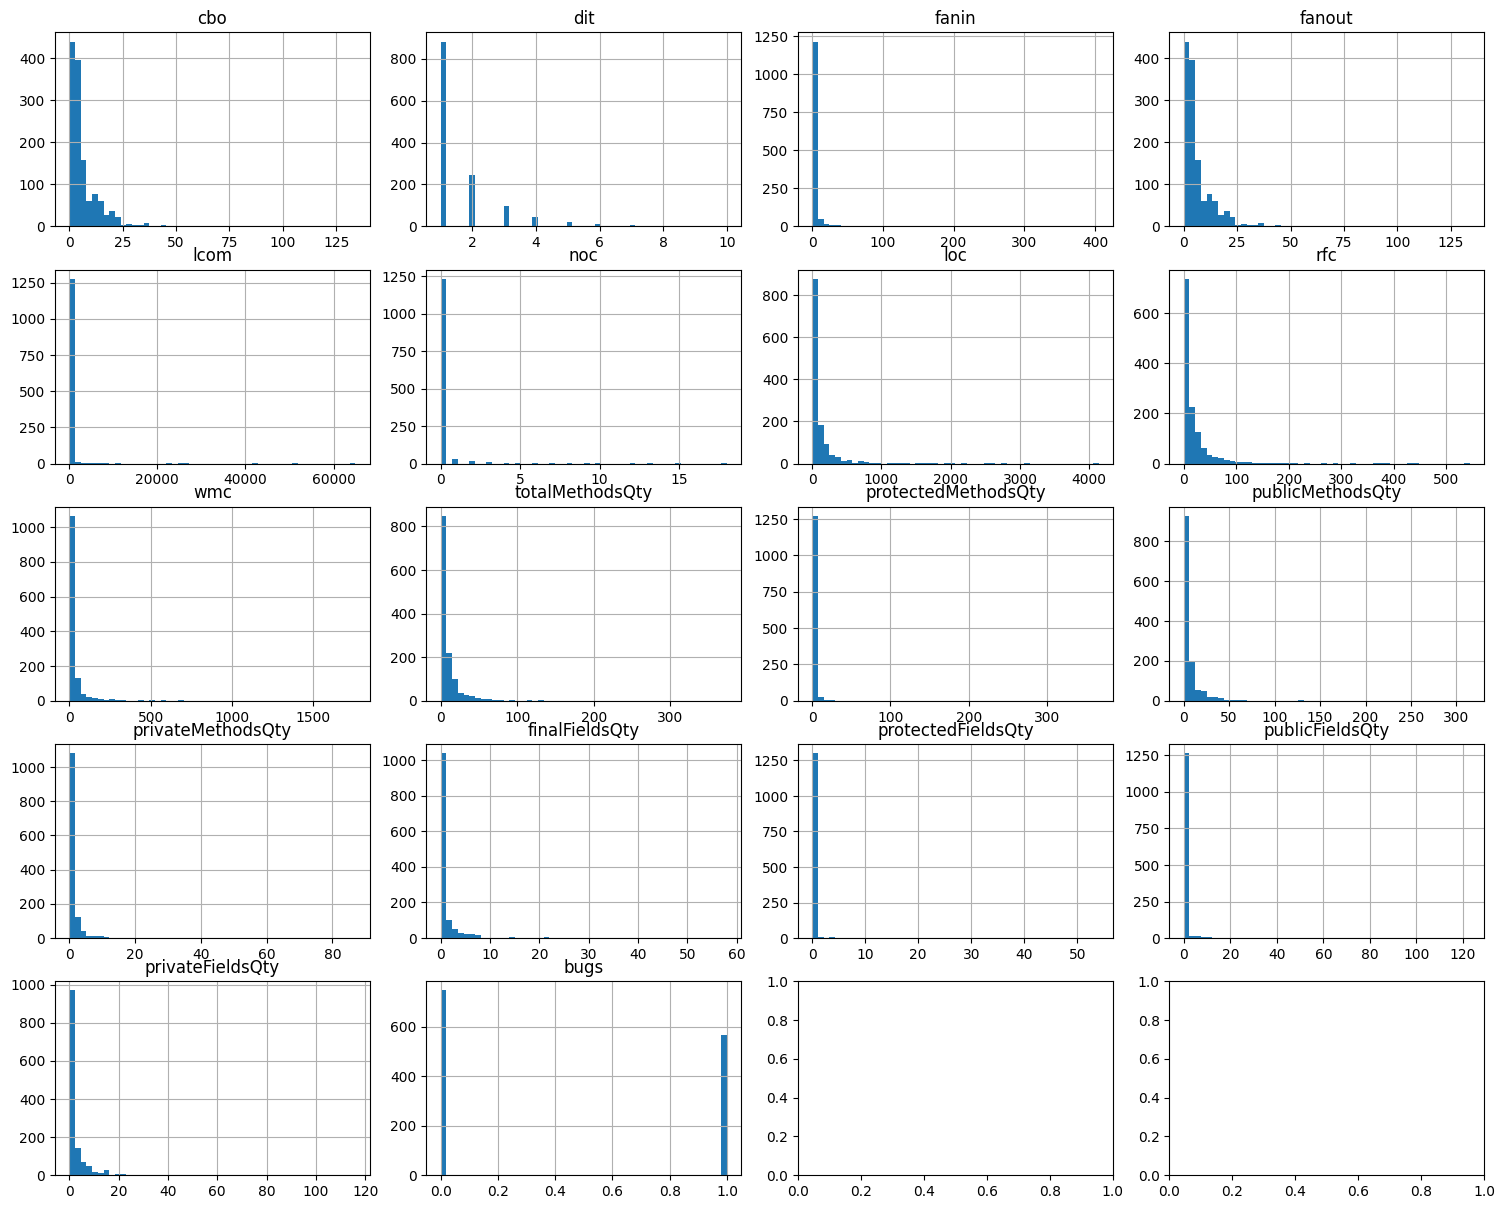

In [8]:
#Data Exploration
import matplotlib.pyplot as plt
rows, cols = 5, 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
fig.tight_layout(pad=1.0)
axe = axes.ravel()

for i, feature in enumerate(datasdp.columns):
    axe[i].set_title(feature)
    datasdp[feature].hist(bins=50, ax=axe[i])

plt.show()


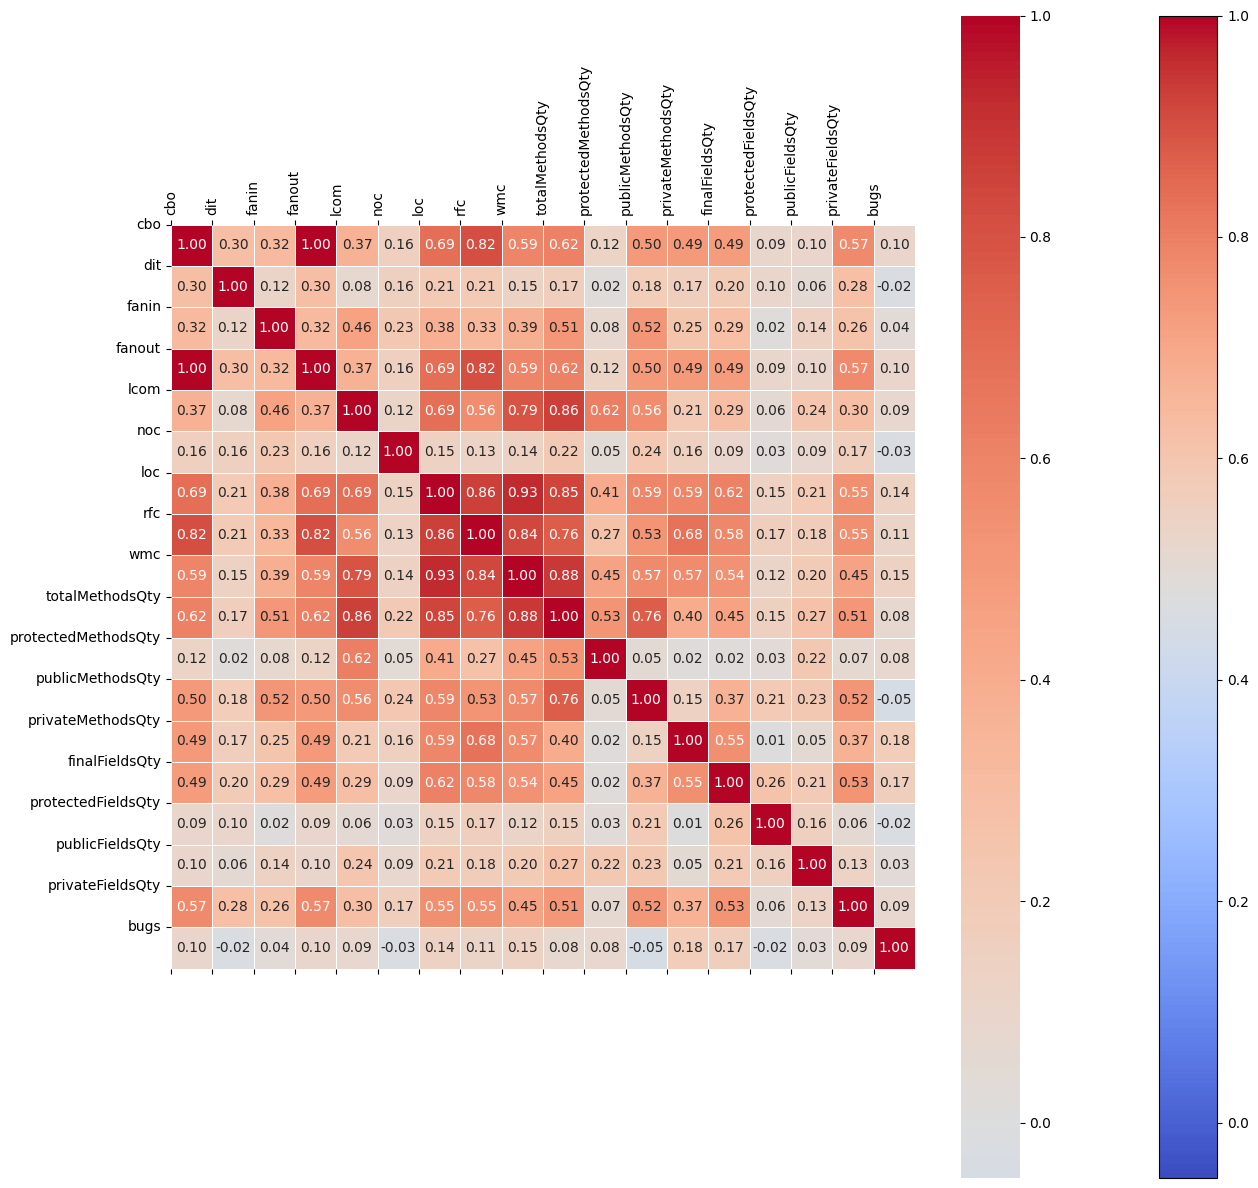

In [9]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = datasdp.corr()

# Heatmap to visualize the correlations
plt.figure(figsize=(15, 15))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()
     

In [3]:
datasdp = pd.read_csv('D:\AAAAKK SKRIPSWEETT\Bismillah Code Skripsi V2\Dataset\dataset_sdp_undersampling.csv', delimiter=";")

X = datasdp.drop(columns=['bugs'])
y = datasdp['bugs']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

counts_training = y_train.value_counts()
print("data distribiution data training: ", counts_training)
counts_testing = y_train_base.value_counts()
print("data distribiution data testing: ", counts_testing)

data distribiution data training:  bugs
0    593
1    458
Name: count, dtype: int64
data distribiution data testing:  bugs
0    286
1    239
Name: count, dtype: int64


Validation roc auc score:  0.828817587641117
validation accuracy :  0.8365019011406845
validation recall :  0.7818181818181819
validation f1-score :  0.8
validation precision :  0.819047619047619


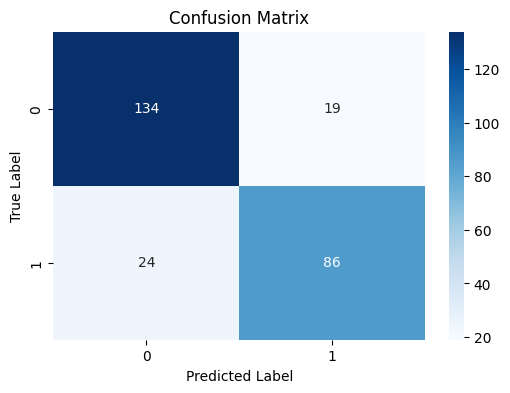

Waktu pelatihan: 4.7227 detik
Penggunaan memori: 28.8205 MB (saat ini), 28.8817 MB (puncak)


In [ ]:
#random forest
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

rf_model = RandomForestClassifier(
    n_estimators=40,
    max_depth=4,
    min_samples_leaf=5,
    criterion='gini'
)

rf_model.fit(X_train_base, y_train_base)
predictions_rf = rf_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8269756387403447
validation accuracy :  0.8403041825095057
validation recall :  0.7454545454545455
validation f1-score :  0.7961165048543689
validation precision :  0.8541666666666666


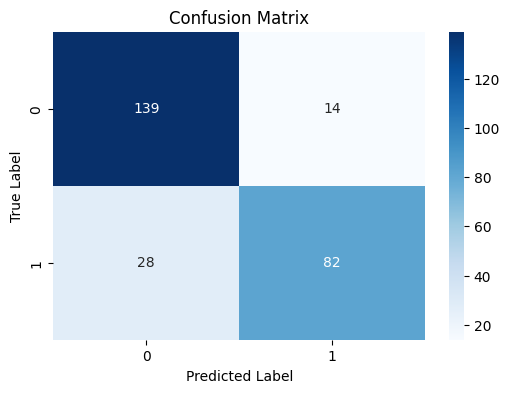

Waktu pelatihan: 8.3973 detik
Penggunaan memori: 48.2366 MB (saat ini), 48.3098 MB (puncak)


In [9]:
#2. extra trees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

et_model = ExtraTreesClassifier(
    n_estimators=30,
    max_depth=8,
    min_samples_leaf=4,
    criterion='gini'
)

et_model.fit(X_train_base, y_train_base)
predictions_rf = et_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation roc auc score:  0.83407605466429
validation accuracy :  0.844106463878327
validation recall :  0.7727272727272727
validation f1-score :  0.8056872037914692
validation precision :  0.8415841584158416


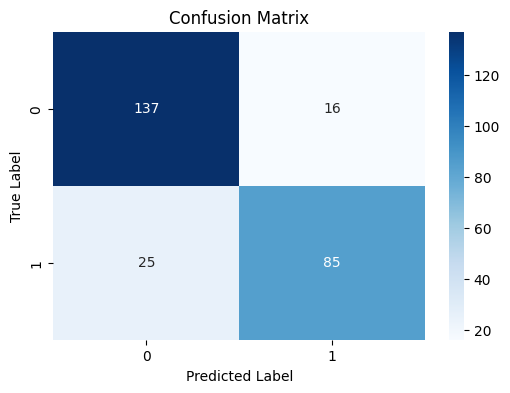

Waktu pelatihan: 0.9247 detik
Penggunaan memori: 1.2678 MB (saat ini), 1.3379 MB (puncak)


In [ ]:
#3. Adapative Boosting (AdaaBoost) using smote technique

from sklearn.ensemble  import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# Mulme = time.time()
tracemalloc.start()

adaboost_model = ai tracking waktu dan memori
start_tiAdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.1
)

adaboost_model.fit(X_train_base, y_train_base)
predictions_rf = adaboost_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8093582887700534
validation accuracy :  0.8212927756653993
validation recall :  0.7363636363636363
validation f1-score :  0.7751196172248804
validation precision :  0.8181818181818182


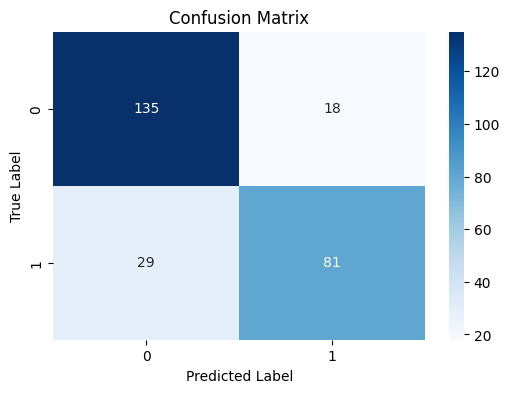

Waktu pelatihan: 9.6227 detik
Penggunaan memori: 1.1829 MB (saat ini), 1.2528 MB (puncak)


In [11]:
#4. Gradient Boosting 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

gb_model = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.01,
    min_samples_leaf=5,
    max_depth=3,
    loss='exponential'
)
   

gb_model.fit(X_train_base, y_train_base)
predictions_rf = gb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.7969994058229353
validation accuracy :  0.8098859315589354
validation recall :  0.7181818181818181
validation f1-score :  0.7596153846153846
validation precision :  0.8061224489795918


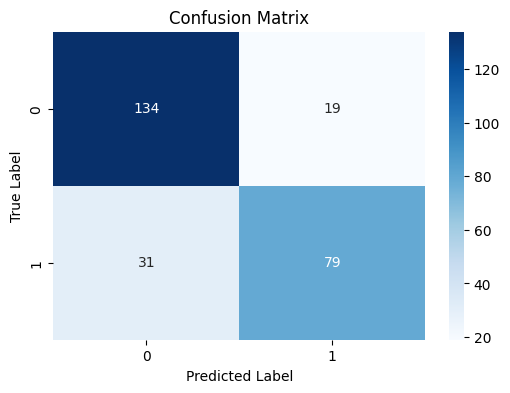

Waktu pelatihan: 0.5252 detik
Penggunaan memori: 1.2158 MB (saat ini), 1.2862 MB (puncak)


In [16]:
#5. Histogram Gradient Boosting

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

hgb_model = HistGradientBoostingClassifier(
    max_iter=50,
    learning_rate=0.01,
    min_samples_leaf=5,
    max_depth=3)
   

hgb_model.fit(X_train_base, y_train_base)
predictions_rf = hgb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.8139037433155081
validation accuracy :  0.8250950570342205
validation recall :  0.7454545454545455
validation f1-score :  0.780952380952381
validation precision :  0.82


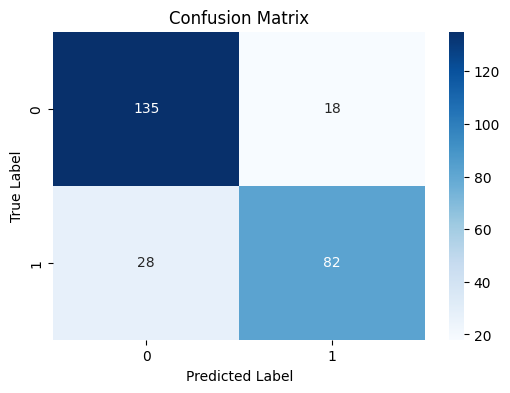

Waktu pelatihan: 0.4905 detik
Penggunaan memori: 1.1168 MB (saat ini), 1.1854 MB (puncak)


In [18]:
#6. XGBoost 

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

xgb_model = XGBClassifier(
    n_estimators=50, 
    max_depth=4,
    learning_rate=0.01)
   

xgb_model.fit(X_train_base, y_train_base)
predictions_rf = xgb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.82825311942959
validation accuracy :  0.8403041825095057
validation recall :  0.7545454545454545
validation f1-score :  0.7980769230769231
validation precision :  0.8469387755102041


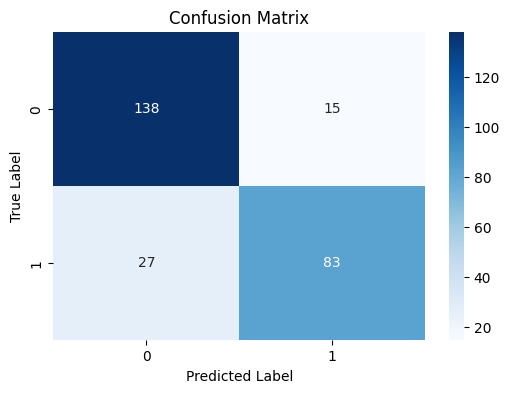

Waktu pelatihan: 6.8303 detik
Penggunaan memori: 1.1583 MB (saat ini), 1.2301 MB (puncak)


In [19]:
#7. Categorical Boosting (CatBoost)

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

cb_model = CatBoostClassifier(
    n_estimators=50,
    loss_function='Logloss',
    learning_rate=0.01,
    depth=5,
    min_data_in_leaf=1,
    random_seed=1,
    logging_level='Silent')
   
cb_model.fit(X_train_base, y_train_base)
predictions_rf = cb_model.predict(X_holdout)

#metrics calculation
roc_auc = roc_auc_score(y_holdout, predictions_rf)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, predictions_rf)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, predictions_rf)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, predictions_rf)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, predictions_rf)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()

Validation roc auc score:  0.857516339869281
validation accuracy :  0.8669201520912547
validation recall :  0.8
validation f1-score :  0.8341232227488151
validation precision :  0.8712871287128713


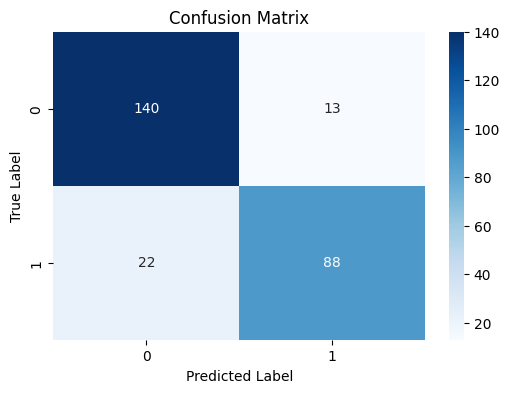

Waktu pelatihan: 14.4915 detik
Penggunaan memori: 1.7622 MB (saat ini), 1.8334 MB (puncak)


In [25]:
#create stacking ensemble
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Mulai tracking waktu dan memori
start_time = time.time()
tracemalloc.start()

estimators_base_model = [
    ('randomforest', rf_model),
    ('extratrees', et_model),
    ('adaboost', adaboost_model),
    ('gradboost', gb_model),
    ('hgboost', hgb_model),
    ('xgboost', xgb_model),
    ('catboost', cb_model), 
]

#stacked model with  base model and logistic
stack_model = StackingClassifier(
    estimators=estimators_base_model, 
    final_estimator=RandomForestClassifier(), 
    passthrough=False,
    n_jobs=-1)

#train the model
stack_model.fit(X_train, y_train)

#get prediction from stack
stack_predictors = stack_model.predict(X_holdout)

#evaluate model
#metrics calculation
roc_auc = roc_auc_score(y_holdout, stack_predictors)
print('Validation roc auc score: ', roc_auc)

accuracy = accuracy_score(y_holdout, stack_predictors)
print('validation accuracy : ', accuracy)

recall = recall_score(y_holdout, stack_predictors)
print('validation recall : ', recall)

f1score = f1_score(y_holdout, stack_predictors)
print('validation f1-score : ', f1score)

precision  = precision_score(y_holdout, stack_predictors)
print('validation precision : ', precision)

#Confussion Metrics of Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_holdout, stack_predictors)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Akhiri tracking memori dan waktu
current, peak = tracemalloc.get_traced_memory()
end_time = time.time()

# Output
print(f"Waktu pelatihan: {end_time - start_time:.4f} detik")
print(f"Penggunaan memori: {current / 10**6:.4f} MB (saat ini), {peak / 10**6:.4f} MB (puncak)")

# Stop tracing
tracemalloc.stop()
